***
***

## The Geometry of Culture

Analyzing Meaning through Word Embeddings

***
***

Code and data associated with the ASR paper on the Geometry of Culture. The full paper can be found here: https://journals.sagepub.com/doi/full/10.1177/0003122419877135

Austin C. Kozlowski; Matt Taddy; James A. Evans

Word embeddings represent **semantic relations** between words as **geometric relationships** between vectors in a high-dimensional space, operationalizing a relational model of meaning consistent with contemporary theories of identity and culture. 

## Download this repo
https://github.com/KnowledgeLab/GeometryofCulture

下载
- affluence_pairs.csv

- gender_pairs.csv

- race_pairs.csv


- Dimensions induced by word differences (e.g. man - woman, rich - poor, black - white, liberal - conservative) in these vector spaces closely correspond to dimensions of cultural meaning, 
- Macro-cultural investigation with a longitudinal analysis of the coevolution of gender and class associations in the United States over the 20th century 

The success of these high-dimensional models motivates a move towards "high-dimensional theorizing" of meanings, identities and cultural processes.

$$
\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} },
$$

where $A_i$ and $B_i$ are components of vector $A$ and $B$ respectively.

In [19]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

cos_sim([1, 0, -1], [-1,-1, 0])

-0.4999999999999999

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([[1, 0, -1]], [[-1,-1, 0]])

array([[-0.5]])

### Google News Word2Vec

You can download Google’s pre-trained model here.

- It’s 1.5GB! 
- It includes word vectors for a vocabulary of 3 million words and phrases 
- It is trained on roughly 100 billion words from a Google News dataset. 
- The vector length is 300 features.

http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/

Using the **Gensim** library in python, we can 
- find the most similar words to the resulting vector. 
- add and subtract word vectors, 


In [1]:
import gensim
# Load Google's pre-trained Word2Vec model.
filepath = '/Users/datalab/bigdata/GoogleNews-vectors-negative300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(filepath, binary=True) 

In [3]:
model['woman'][:10]

array([ 0.24316406, -0.07714844, -0.10302734, -0.10742188,  0.11816406,
       -0.10742188, -0.11425781,  0.02563477,  0.11181641,  0.04858398],
      dtype=float32)

In [7]:
model.most_similar('Socrates')

[('Plato_Apology', 0.5661361217498779),
 ('philosopher_Socrates', 0.561074435710907),
 ('Aristotle', 0.5599992275238037),
 ('Parmenides', 0.541626513004303),
 ('Sophists', 0.5381807088851929),
 ('Sócrates', 0.533310055732727),
 ('Plato', 0.5317621827125549),
 ('philosopher_Aristotle', 0.5256754159927368),
 ('Plato_Socrates', 0.524064838886261),
 ('philosopher_Plato', 0.5164784789085388)]

In [10]:
model.similarity('woman', 'man')

0.76640123

In [24]:
cos_sim(model['woman'], model['man'])

0.76640123

In [25]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133)]

In [52]:
from numpy import dot  #Dot product#
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial


def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

def cos(x, y):
    return 1 - spatial.distance.cosine(x, y)

def nrm(x):
    # Normalize vector#
    return x/norm(x)

def dimension(x, y):
    # Calculate semantic dimension from antonym pair#
    return nrm(nrm(x)-nrm(y))


In [82]:
###IMPORT LISTS OF TERMS TO PROJECT AND ANTONYM PAIRS#####
import pandas as pd
ant_pairs_aff = pd.read_csv("./GeometryofCulture/code/word_pairs/affluence_pairs.csv",header=None)
ant_pairs_gen = pd.read_csv("./GeometryofCulture/code/word_pairs/gender_pairs.csv",header=None)
ant_pairs_race = pd.read_csv("./GeometryofCulture/code/word_pairs/race_pairs.csv",header=None)

In [89]:
pd.read_csv?

In [90]:
df_survey = pd.read_csv("./GeometryofCulture//survey_data/survey_means_weighted.csv", skiprows = 1,
                       names = ['word','gender_mean','class_mean','race_mean'])
df_survey.head()


,word,gender_mean,class_mean,race_mean
0,basketball,72.49233,37.48029,81.05358
1,baseball,77.60552,46.90747,38.39533
2,boxing,86.39916,36.92365,64.95531
3,softball,32.61073,45.31939,26.82060
4,volleyball,31.83629,54.05517,25.81080


```R
make_dim<-function(embedding,pairs){
                    word_dims<-data.frame(matrix(NA,nrow(pairs),300))
                    for (j in 1:nrow(pairs)){
                    rp_word1<-pairs[j,1]
                    rp_word2<-pairs[j,2]
                    tryCatch(word_dims[j,]<-dimension(embedding[rp_word1,],
                        embedding[rp_word2,]),
                        error=function(e){})
                    }
                    dim_ave<-colMeans(word_dims, na.rm = TRUE)
                    dim_ave_n<-nrm(dim_ave)
                    return(dim_ave_n)
                    }
```

In [91]:
df_survey

,word,gender_mean,class_mean,race_mean
0,basketball,72.49233,37.48029,81.05358
1,baseball,77.60552,46.90747,38.39533
2,boxing,86.39916,36.92365,64.95531
3,softball,32.61073,45.31939,26.82060
4,volleyball,31.83629,54.05517,25.81080
5,tennis,42.65294,75.34252,25.93527
6,golf,64.92760,82.92412,21.00702
7,hockey,84.42197,40.18831,18.71368
8,soccer,64.12531,44.74304,35.91770
9,hairdresser,20.69020,25.58188,50.86118


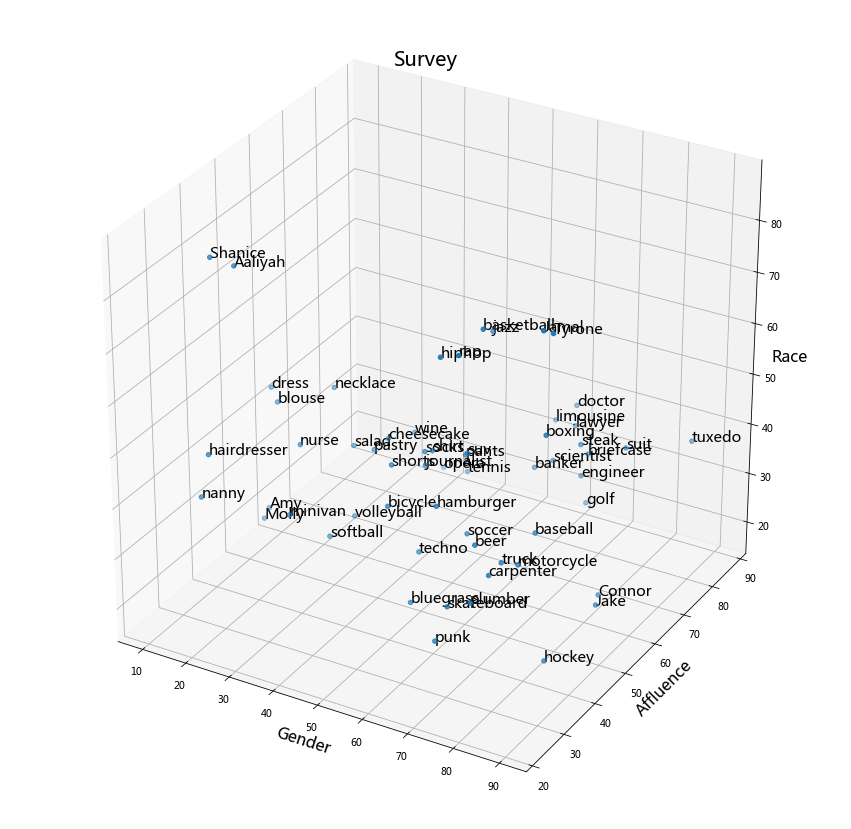

In [106]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize = [15, 15])
ax = fig.add_subplot(111, projection='3d') 
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
ax.scatter(df_survey['gender_mean'], df_survey['class_mean'], df_survey['race_mean'])
for k, i in enumerate(df_survey['word']):
    ax.text(df_survey['gender_mean'][k], df_survey['class_mean'][k], df_survey['race_mean'][k], 
        i,  size=15, zorder=1, color='k')
ax.set_xlabel('Gender', fontsize = 16)
ax.set_ylabel('Affluence', fontsize = 16)
ax.set_zlabel('Race', fontsize = 16)
ax.set_title('Survey', fontsize = 20)
plt.show()

In [68]:
def make_dim(model, df):
    word_dims = []
    for i in df.index:
        rp_word1 = df[0][i]
        rp_word2 = df[1][i]
        try:
            word_dims.append( dimension(model[rp_word1], model[rp_word2]) )
        except:
            pass
    dim_ave = pd.DataFrame(word_dims).mean().tolist()
    dim_ave_= nrm(dim_ave)
    return dim_ave
    

In [73]:
aff_dim = make_dim(model, ant_pairs_aff)
gender_dim = make_dim(model, ant_pairs_gen)
race_dim = make_dim(model, ant_pairs_race)


In [75]:
cos(aff_dim,gender_dim), cos(aff_dim,race_dim), cos(gender_dim,race_dim)

(-0.014282578052009498, -0.10834102639266807, -0.06033891833467253)

In [83]:
wlist=["camping","baseball","boxing","volleyball","softball","golf","tennis","soccer","basketball","hockey"]

aff_proj = [cos(aff_dim, model[i]) for i in wlist]
gender_proj = [cos(gender_dim, model[i]) for i in wlist]
race_proj = [cos(race_dim, model[i]) for i in wlist]

In [85]:
dimension(model['man'], model['woman'])[:5]

array([ 0.07256063,  0.12535858,  0.07870991,  0.0066219 , -0.00821159],
      dtype=float32)

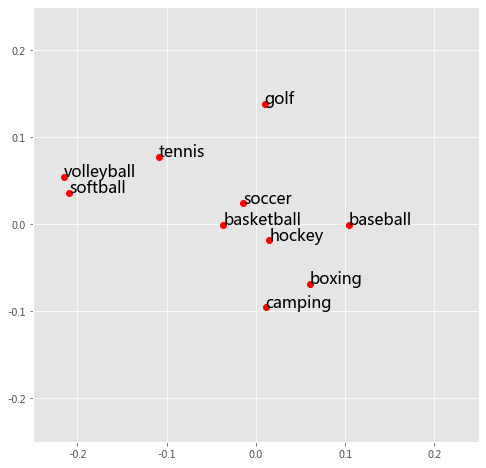

In [95]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

plt.figure(figsize  = [8, 8])
plt.plot(gender_proj, aff_proj, 'ro')
for k, i in enumerate(wlist):
    plt.text(gender_proj[k], aff_proj[k], i, fontsize = 16)
plt.xlim([-0.25, 0.25])
plt.ylim([-0.25, 0.25])

plt.show()

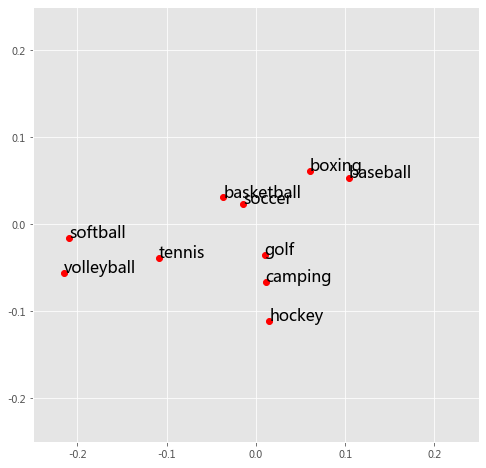

In [96]:
plt.figure(figsize  = [8, 8])
plt.plot(gender_proj, race_proj, 'ro')
for k, i in enumerate(wlist):
    plt.text(gender_proj[k], race_proj[k], i, fontsize = 16)
plt.xlim([-0.25, 0.25])
plt.ylim([-0.25, 0.25])

plt.show()

Now that we’ve looked at trained word embeddings, 

- let’s learn more about the training process. 
- But before we get to word2vec, we need to look at a conceptual parent of word embeddings: **the neural language model**.



# Gensim Word2vec 

In [16]:
import gensim as gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.word2vec import LineSentence

In [126]:
# 下载理想国英文版本txt文件，网址为：http://www.gutenberg.org/cache/epub/150/pg150.txt

with open("pg150.txt", 'r') as f:
    lines = f.readlines()


In [133]:
len(lines)

16960

In [134]:
import string

def clean_text(s):
    for c in string.punctuation:
        s= s.replace(c,"")
    return s

lines = [clean_text(line) for line in lines]

In [174]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [172]:
book = []
paragraph = ''
for i in lines:
    if i !='\n':
        paragraph = paragraph + ' '+ i
    else:
        book.append(paragraph)
        paragraph = ''
    

len(book)

4523

In [173]:
book = [i.strip().replace('\n', '').split(' ') for i in book]
book = [i for i in book if i[0]]


In [143]:
# 调用gensim Word2Vec的算法进行训练。
# 参数分别为：size: 嵌入后的词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model = Word2Vec(book, size = 100, window = 3 , min_count = 0)

In [176]:
model.wv['Socrates']

array([-0.61977464, -0.2789243 ,  0.39779395, -0.1521341 ,  0.19450915,
        0.26730332,  0.13636921,  0.01279074, -0.250142  ,  0.176398  ,
       -0.82600456, -0.02069568, -0.39612505, -0.07211145,  0.28334576,
       -0.21025997, -0.06018108, -0.2703659 ,  0.2543907 , -0.07402172,
        0.02277775, -0.3101242 , -0.15688632, -0.43599615, -0.08127858,
        0.02526959,  0.15285605, -0.10695933, -1.0990864 ,  0.50576496,
        0.33032408,  0.31920555,  0.5328262 , -0.18723547,  0.39299726,
        0.2909096 , -0.63782084, -0.50308   , -0.7109864 , -0.42286614,
       -0.16806383, -0.24568759,  0.39323896, -0.08858129, -0.07306071,
        0.10967018,  0.09954332,  0.22106184, -0.36907125,  0.5014113 ,
       -0.17050767,  0.02704148,  0.18014228, -0.23702276, -0.22526625,
        0.72360724,  0.21799144, -0.24428567,  0.33379462,  0.18194786,
       -0.0972083 , -0.00797158, -0.65299904, -0.17891935,  0.18754293,
        0.28530613, -0.19684072,  0.24156635, -0.4839683 ,  0.65

In [145]:
model.wv.most_similar('Socrates', topn = 10)

[('indeed', 0.9995828866958618),
 ('quite', 0.9995291233062744),
 ('so', 0.9994574785232544),
 ('You', 0.9993287324905396),
 ('certainly', 0.9993119835853577),
 ('No', 0.9993115663528442),
 ('right', 0.9992585778236389),
 ('Glaucon', 0.9992482662200928),
 ('Polemarchus', 0.9992305040359497),
 ('sure', 0.9990183711051941)]

In [167]:
model.wv.most_similar('reason', topn = 10)

[('out', 0.9998725652694702),
 ('great', 0.999868631362915),
 ('greater', 0.9998423457145691),
 ('greatest', 0.9998365640640259),
 ('himself', 0.9998359680175781),
 ('mind', 0.9998278617858887),
 ('beauty', 0.9998177886009216),
 ('science', 0.9998157620429993),
 ('against', 0.9998141527175903),
 ('over', 0.9998131990432739)]

In [146]:
model.wv.most_similar('justice', topn = 10)

[('injustice', 0.999813973903656),
 ('best', 0.9997889995574951),
 ('reason', 0.999771237373352),
 ('these', 0.9997555017471313),
 ('opinion', 0.9997439384460449),
 ('great', 0.9997347593307495),
 ('out', 0.9997308254241943),
 ('after', 0.9997212886810303),
 ('others', 0.9997150301933289),
 ('third', 0.999714732170105)]

In [165]:
model.wv.most_similar('knowledge', topn = 10)

[('nature', 0.9998851418495178),
 ('life', 0.9998245239257812),
 ('part', 0.9998000264167786),
 ('interest', 0.9996935129165649),
 ('art', 0.9996891021728516),
 ('either', 0.9996746778488159),
 ('each', 0.9996728897094727),
 ('lover', 0.999637246131897),
 ('into', 0.9996317625045776),
 ('wealth', 0.9995990991592407)]

In [148]:
# 将词向量投影到二维空间
import numpy as np
from sklearn.decomposition import PCA

rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.vocab):
    rawWordVec.append(model[w])
    word2ind[w] = i
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [150]:
ind2word = {j:i for i,j in word2ind.items()}

In [151]:
for k,i in enumerate(X_reduced):
    if i[0] > 5:
        word = ind2word[k]
        print(word, i[0], i[1])

of 5.775449 -2.365114
by 5.7966013 -0.686989
at 5.7140913 -0.6895864
is 5.2666035 -0.22650619
for 5.440587 -0.34015343
the 5.7026706 -2.0213323
no 5.131916 -0.08794426
and 6.025783 -1.380838
with 5.9404025 -0.60730803
 6.1095376 0.7562497
may 5.1396465 0.6410318
or 5.845921 -1.4204043
this 5.316845 -0.03274336
his 5.7643585 -0.82136303
them 5.337402 -0.65124035
are 5.481497 -0.13986424
to 5.5692005 -0.39530832
in 5.608388 -1.4282805
more 5.2522154 -0.37258935
as 5.4510064 0.1744433
other 5.2715945 -1.3242022
has 5.456502 -0.26779988
an 5.6519847 -0.41095412
which 5.4807644 -0.8213325
not 5.171643 0.9786585
only 5.078563 -0.20989203
but 5.4977016 0.33104333
all 5.0754914 -0.68958926
a 5.6950903 -0.8660045
any 5.3072963 -1.0395184
be 5.3477116 0.0684813
was 5.24336 0.5035284
who 5.5104465 -0.58971226
from 5.8926296 -0.73592716
than 5.106923 -0.7418656
have 5.23742 0.5617677
into 5.4926925 -0.6235462
on 5.6597075 -0.7053441
he 5.485511 2.0886707
we 5.488679 1.0635062
that 5.4981356 1.2675

In [158]:
for k,i in enumerate(X_reduced):
    if i[1] < -1:
        word = ind2word[k]
        print(word, i[0], i[1])

of 5.775449 -2.365114
the 5.7026706 -2.0213323
and 6.025783 -1.380838
or 5.845921 -1.4204043
in 5.608388 -1.4282805
State 4.0419846 -1.0099387
other 5.2715945 -1.3242022
any 5.3072963 -1.0395184


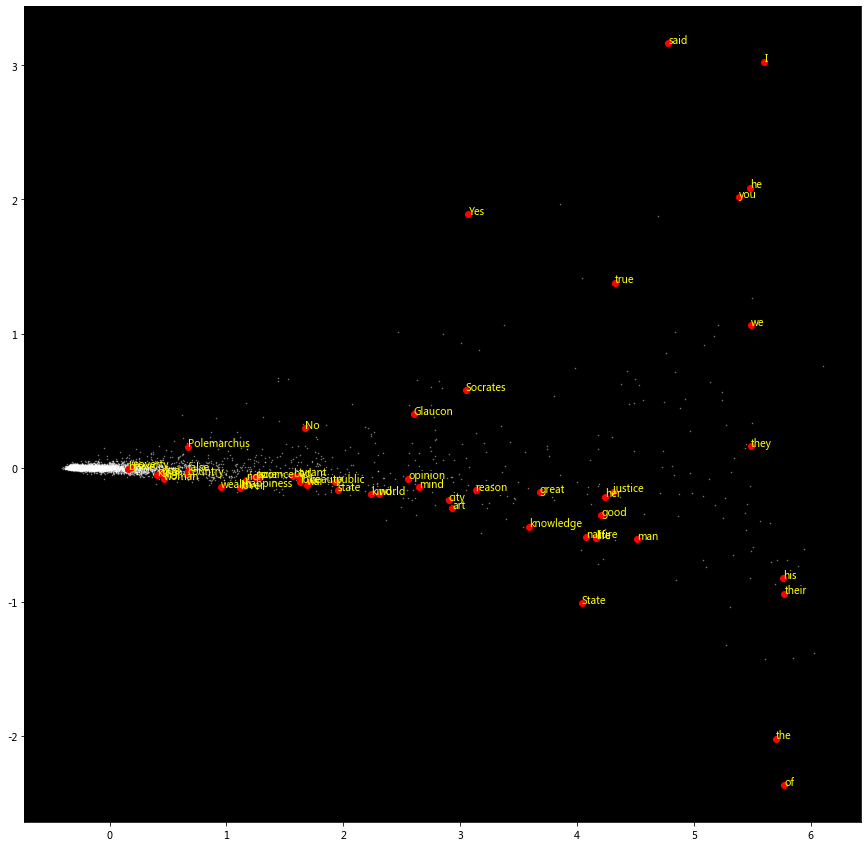

In [171]:
# 绘制星空图
# 绘制所有单词向量的二维空间投影
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 15))
ax = fig.gca()
ax.set_facecolor('black')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.5, color = 'white')
# 绘制几个特殊单词的向量
words = ['Socrates','Glaucon', 'Polemarchus', 'justice', 'city', 'country', 'brave',
         'we','they','you','his', 'her', 'their','I','he',
         'Yes','No','said','true', 'false','science', 'beauty',
         'love', 'life', 'kind', 'opinion','state','State','lover',
         'great','mind',
         'god','world','tyrant','reason','wealth', 'poverty', 'poor', 'rich',
         'of','the', 'life', 'knowledge','happiness', 'nature', 'art','intrest', 
         'good','public', 'bad', 'war', 'man', 'woman', 'king'] # change here
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], 'o', alpha =1, color = 'red')
        plt.text(xy[0], xy[1], w,  alpha = 1, color = 'yellow')

# END